<center><h1>Assignment 4</h1></center>

## Problem Statement
Use Autoencoder to implement anomaly detection. Build the model by using:
1. Import required libraries
2. Upload / access the dataset
3. Encoder converts it into latent representation
4. Decoder networks convert it back to the original input
5. Compile the models with Optimizer, Loss, and Evaluation Metrics

## Notebook Details
1. Author : Varad Girish Mashalkar
2. Branch : Information Technology
3. Division : BE 11
4. Batch : Q11
5. Roll Number : 43335
6. Course : Laboratory Practice 4 (Deep Learning)

## Implementation Details
1. Python version : 3.7.0
2. Tensorflow version : 2.7.0 (Compatible with CUDA11.5 and cuDNN8.6.0)

## Imports
1. numpy
2. tensorflow
3. matplotlib
4. seaborn
5. sklearn.metrics.accuracy_score
6. sklearn.preprocessing.MinMaxScaler
7. sklearn.model_selection.train_test_split
8. pandas

## ECG dataset
1. Dataset link : http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv

# Downloading the dataset

In [1]:
!wget http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv

--2022-10-29 11:41:38--  http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.196.208, 172.217.167.240, 142.250.207.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.196.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7877383 (7.5M) [text/csv]
Saving to: ‘ecg.csv’

ecg.csv             100%[===================>]   7.51M  9.88MB/s    in 0.8s    

2022-10-29 11:41:40 (9.88 MB/s) - ‘ecg.csv’ saved [7877383/7877383]



# 1. Importing required libraries

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
sns.set()
%matplotlib inline

/home/varadmash/anaconda3/envs/python3.7_DL/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
# Checking import version of tensorflow
tf.__version__

'2.7.0'

# 2. Loading the dataset

In [7]:
raw_data = pd.read_csv("./ecg.csv", header=None)

In [8]:
raw_data.shape

(4998, 141)

# 3. Data analysis

### a) Checking dataset header

In [9]:
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


## Note :

1. The last column is the target column
2. 0 indicates anomolous data point
3. 1 indicate normal data point

### b) Counting the anamolous and non anamolous data points

In [10]:
targets, frequencies = np.unique(raw_data.iloc[:, -1], return_counts=True)
print(targets)
print(frequencies)

[0. 1.]
[2079 2919]


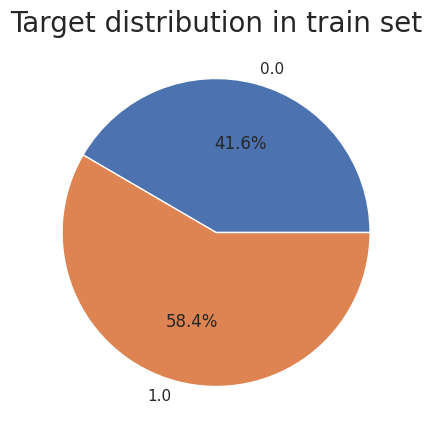

In [14]:
# Plotting pie chart for the distribution of targets in train and test sets
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.pie(
    x=frequencies,
    labels=targets,
    autopct='%1.1f%%'
)
plt.title("Target distribution in train set", fontsize=20)
plt.show()

# Observations :

1. Percentage of anamolous data points : 41.6%

# 4. Data preprocessing

## a) Splitting inputs and targets

In [15]:
# Scaling train and test inputs for a range of 0 to 1 by dividing by 255 (scalar)
inputs = raw_data.iloc[:, :-1]
labels = raw_data.iloc[:, -1]

In [16]:
print(inputs.shape)
print(labels.shape)

(4998, 140)
(4998,)


## b) Splitting the training and testing data

Split ratio : 80:20

In [17]:
# Splitting data into 80 to 20 ratio of training and testing
train_inputs, test_inputs, train_labels, test_labels = train_test_split(
    inputs,
    labels,
    test_size=0.2,
    stratify=labels
)

## c) Scaling the data

In [18]:
# Initializing scaler object
scaler = MinMaxScaler(feature_range=(0, 1))

In [19]:
train_inputs_scaled = scaler.fit_transform(train_inputs.copy())
test_inputs_scaled = scaler.transform(test_inputs.copy())

# 5. Model Definition

In [28]:
# create a model by subclassing Model class in tensorflow
class AutoEncoder(tf.keras.Model):

    def __init__(self, output_units, code_size=8):
        super().__init__()
        self.encoder = tf.keras.models.Sequential([
          tfl.Dense(64, activation='relu'),
          tfl.Dropout(0.1),
          tfl.Dense(32, activation='relu'),
          tfl.Dropout(0.1),
          tfl.Dense(16, activation='relu'),
          tfl.Dropout(0.1),
          tfl.Dense(code_size, activation='relu')
        ])
        self.decoder = tf.keras.models.Sequential([
          tfl.Dense(16, activation='relu'),
          tfl.Dropout(0.1),
          tfl.Dense(32, activation='relu'),
          tfl.Dropout(0.1),
          tfl.Dense(64, activation='relu'),
          tfl.Dropout(0.1),
          tfl.Dense(output_units, activation='sigmoid')
        ])
  
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

# 6. Model Configuration and initialization

In [29]:
model = AutoEncoder(output_units=train_inputs_scaled.shape[1])
# configurations of model
model.compile(
    loss='msle', 
    metrics=['mse'], 
    optimizer='adam'
)

# 7. Model training

In [31]:
history = model.fit(
    train_inputs_scaled,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_inputs_scaled, test_labels)
)

Epoch 1/20
8/8 [==============================] - 13s 74ms/step - loss: 0.1166 - mse: 0.2497 - val_loss: 0.1164 - val_mse: 0.2489
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 0.1159 - mse: 0.2474 - val_loss: 0.1143 - val_mse: 0.2431
Epoch 3/20
8/8 [==============================] - 0s 9ms/step - loss: 0.1128 - mse: 0.2384 - val_loss: 0.1078 - val_mse: 0.2254
Epoch 4/20
8/8 [==============================] - 0s 21ms/step - loss: 0.1042 - mse: 0.2134 - val_loss: 0.0931 - val_mse: 0.1829
Epoch 5/20
8/8 [==============================] - 0s 22ms/step - loss: 0.0901 - mse: 0.1713 - val_loss: 0.0781 - val_mse: 0.1362
Epoch 6/20
8/8 [==============================] - 0s 20ms/step - loss: 0.0782 - mse: 0.1358 - val_loss: 0.0706 - val_mse: 0.1150
Epoch 7/20
8/8 [==============================] - 0s 20ms/step - loss: 0.0716 - mse: 0.1181 - val_loss: 0.0670 - val_mse: 0.1057
Epoch 8/20
8/8 [==============================] - 0s 24ms/step - loss: 0.0674 - mse: 0.1084 - val_

# 8. Plotting the training loss

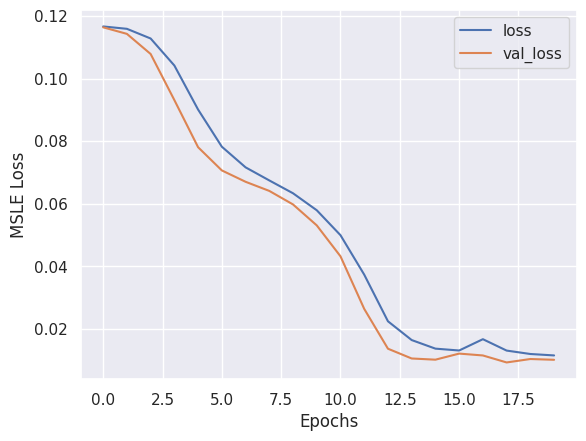

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

# 9. Defining utilities for calculating threshold

In [34]:
def find_threshold(model, x_train_scaled):
    reconstructions = model.predict(x_train_scaled)
    # provides losses of individual instances
    reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
    # threshold for anomaly scores
    threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
    return threshold

def get_predictions(model, x_test_scaled, threshold):
    predictions = model.predict(x_test_scaled)
    # provides losses of individual instances
    errors = tf.keras.losses.msle(predictions, x_test_scaled)
    # 0 = anomaly, 1 = normal
    anomaly_mask = pd.Series(errors) > threshold
    preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
    return preds

In [37]:
# Calculating thresholds
threshold = find_threshold(model, train_inputs_scaled)
print(f"Threshold: {threshold}")
predictions = get_predictions(model, test_inputs_scaled, threshold)
accuracy_score(predictions, test_labels)

Threshold: 0.19539486490506142


0.949

# 10. Results

1. Testing data accuracy : 94.9%
2. Anomaly threshold : 0.19

<center><h1>End of Notebook</h1></center>